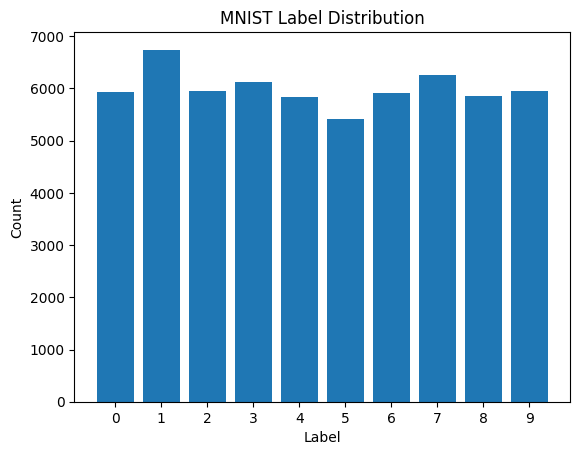

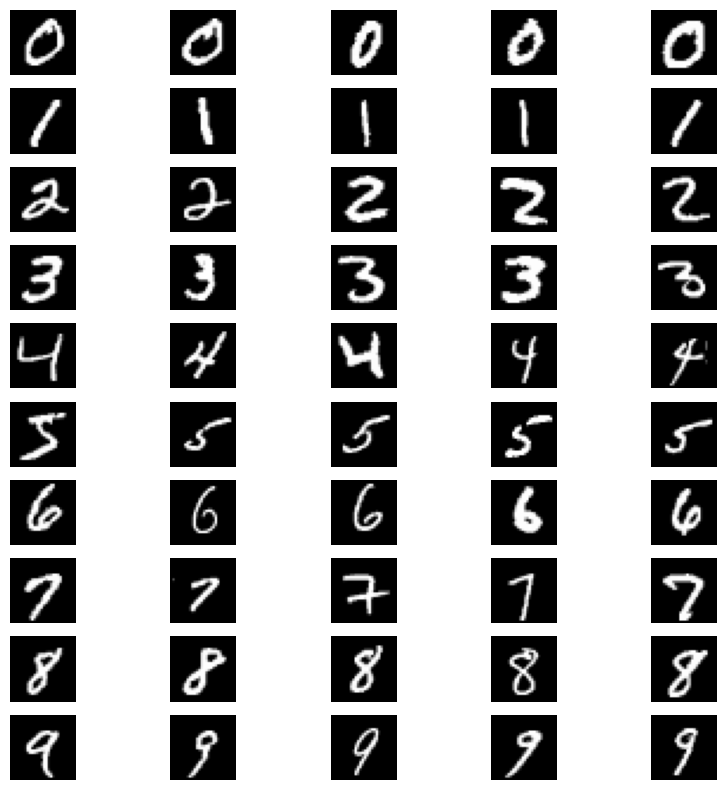

In [1]:
import torch
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import random
from torch.utils.data import DataLoader, random_split
import torch.nn.functional as F

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load the MNIST dataset
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)

# Get the labels from the training dataset
labels = [item[1] for item in trainset]

# Plot a histogram to visualize the label distribution
plt.hist(labels, bins=np.arange(11) - 0.5, rwidth=0.8)
plt.xticks(range(10))
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('MNIST Label Distribution')
plt.show()

# Create a dictionary to store 5 samples for each class
samples_per_class = {i: [] for i in range(10)}

# Populate the dictionary with samples
for image, label in trainset:
    if len(samples_per_class[label]) < 5:
        samples_per_class[label].append(image)

# Visualize the samples
fig, axarr = plt.subplots(10, 5, figsize=(10, 10))
for i in range(10):
    for j in range(5):
        axarr[i, j].imshow(samples_per_class[i][j].numpy().squeeze(), cmap='gray')
        axarr[i, j].axis('off')
plt.show()

val_size = 0.2
num_train = len(trainset)
indices = list(range(num_train))
split = int(np.floor(val_size * num_train))
np.random.seed(0)
np.random.shuffle(indices)

# Split the dataset into train and validation sets
train_indices, val_indices = indices[split:], indices[:split]
train_sampler = torch.utils.data.SubsetRandomSampler(train_indices)
val_sampler = torch.utils.data.SubsetRandomSampler(val_indices)

# Create data loaders for train and validation
trainloader = DataLoader(trainset, batch_size=64, sampler=train_sampler)
valloader = DataLoader(trainset, batch_size=64, sampler=val_sampler)
testloader = DataLoader(testset, batch_size=64)

def plot_feature_maps(image, model, layer):
    model.eval()
    with torch.no_grad():
        feature_maps = layer(image)
    
    num_feature_maps = feature_maps.size(1)
    fig, axes = plt.subplots(1, num_feature_maps, figsize=(15, 3))
    
    for i in range(num_feature_maps):
        axes[i].imshow(feature_maps[0, i].detach().cpu(), cmap='viridis')
        axes[i].axis('off')
        axes[i].set_title(f"FeatMap {i + 1}")


From the histogram in task 2, we can see the distribution of labels. There is no significant imbalance.If there is significant imbalance, ywe may need to balance the dataset by oversampling or undersampling certain classes.

For model.conv1, we do not need to repeat the input image since it already has 1 input channel. For model.conv2, you need to repeat the input image because it expects 16 input channels. 

Training with Hyperparameters: {'learning_rate': 0.001, 'batch_size': 32, 'kernel_size': 3, 'stride': 1, 'num_epochs': 5, 'dropout': 0.0}


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epoch [1/5] | Train Loss: 0.1334 | Train Acc: 95.84%
Epoch [2/5] | Train Loss: 0.0517 | Train Acc: 98.41%
Epoch [3/5] | Train Loss: 0.0388 | Train Acc: 98.81%
Epoch [4/5] | Train Loss: 0.0310 | Train Acc: 99.02%
Epoch [5/5] | Train Loss: 0.0257 | Train Acc: 99.15%
Training with Hyperparameters: {'learning_rate': 0.001, 'batch_size': 32, 'kernel_size': 3, 'stride': 1, 'num_epochs': 5, 'dropout': 0.3}


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Train Accuracy,▁▆▇██
Train Loss,█▃▂▁▁


Epoch [1/5] | Train Loss: 0.1518 | Train Acc: 95.37%
Epoch [2/5] | Train Loss: 0.0559 | Train Acc: 98.29%
Epoch [3/5] | Train Loss: 0.0422 | Train Acc: 98.68%
Epoch [4/5] | Train Loss: 0.0348 | Train Acc: 98.90%
Epoch [5/5] | Train Loss: 0.0281 | Train Acc: 99.10%
Training with Hyperparameters: {'learning_rate': 0.001, 'batch_size': 64, 'kernel_size': 3, 'stride': 1, 'num_epochs': 5, 'dropout': 0.0}


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Train Accuracy,▁▆▇██
Train Loss,█▃▂▁▁


Epoch [1/5] | Train Loss: 0.1623 | Train Acc: 95.20%
Epoch [2/5] | Train Loss: 0.0519 | Train Acc: 98.32%
Epoch [3/5] | Train Loss: 0.0396 | Train Acc: 98.76%
Epoch [4/5] | Train Loss: 0.0303 | Train Acc: 99.06%
Epoch [5/5] | Train Loss: 0.0253 | Train Acc: 99.20%
Training with Hyperparameters: {'learning_rate': 0.001, 'batch_size': 64, 'kernel_size': 3, 'stride': 1, 'num_epochs': 5, 'dropout': 0.3}


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Train Accuracy,▁▆▇██
Train Loss,█▂▂▁▁


Epoch [1/5] | Train Loss: 0.1783 | Train Acc: 94.62%
Epoch [2/5] | Train Loss: 0.0591 | Train Acc: 98.20%
Epoch [3/5] | Train Loss: 0.0438 | Train Acc: 98.66%
Epoch [4/5] | Train Loss: 0.0355 | Train Acc: 98.85%
Epoch [5/5] | Train Loss: 0.0292 | Train Acc: 99.06%
Training with Hyperparameters: {'learning_rate': 0.01, 'batch_size': 32, 'kernel_size': 3, 'stride': 1, 'num_epochs': 5, 'dropout': 0.0}


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Train Accuracy,▁▇▇██
Train Loss,█▂▂▁▁


Epoch [1/5] | Train Loss: 0.4395 | Train Acc: 86.09%
Epoch [2/5] | Train Loss: 0.2996 | Train Acc: 90.73%
Epoch [3/5] | Train Loss: 0.2923 | Train Acc: 90.83%
Epoch [4/5] | Train Loss: 0.2815 | Train Acc: 91.22%
Epoch [5/5] | Train Loss: 0.2741 | Train Acc: 91.51%
Training with Hyperparameters: {'learning_rate': 0.01, 'batch_size': 32, 'kernel_size': 3, 'stride': 1, 'num_epochs': 5, 'dropout': 0.3}


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Train Accuracy,▁▇▇██
Train Loss,█▂▂▁▁


Epoch [1/5] | Train Loss: 0.2209 | Train Acc: 93.31%
Epoch [2/5] | Train Loss: 0.1818 | Train Acc: 94.77%
Epoch [3/5] | Train Loss: 0.1778 | Train Acc: 94.92%
Epoch [4/5] | Train Loss: 0.1766 | Train Acc: 94.94%
Epoch [5/5] | Train Loss: 0.1802 | Train Acc: 94.79%
Training with Hyperparameters: {'learning_rate': 0.01, 'batch_size': 64, 'kernel_size': 3, 'stride': 1, 'num_epochs': 5, 'dropout': 0.0}


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Train Accuracy,▁▇██▇
Train Loss,█▂▁▁▂


Epoch [1/5] | Train Loss: 0.6024 | Train Acc: 78.85%
Epoch [2/5] | Train Loss: 0.2344 | Train Acc: 92.69%
Epoch [3/5] | Train Loss: 0.2152 | Train Acc: 93.44%
Epoch [4/5] | Train Loss: 0.2140 | Train Acc: 93.38%
Epoch [5/5] | Train Loss: 0.2064 | Train Acc: 93.61%
Training with Hyperparameters: {'learning_rate': 0.01, 'batch_size': 64, 'kernel_size': 3, 'stride': 1, 'num_epochs': 5, 'dropout': 0.3}


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Train Accuracy,▁████
Train Loss,█▁▁▁▁


Epoch [1/5] | Train Loss: 0.2306 | Train Acc: 92.97%
Epoch [2/5] | Train Loss: 0.1557 | Train Acc: 95.41%
Epoch [3/5] | Train Loss: 0.1537 | Train Acc: 95.47%
Epoch [4/5] | Train Loss: 0.1527 | Train Acc: 95.56%
Epoch [5/5] | Train Loss: 0.1493 | Train Acc: 95.54%
Best Model Test Accuracy: 98.81
Confusion Matrix:


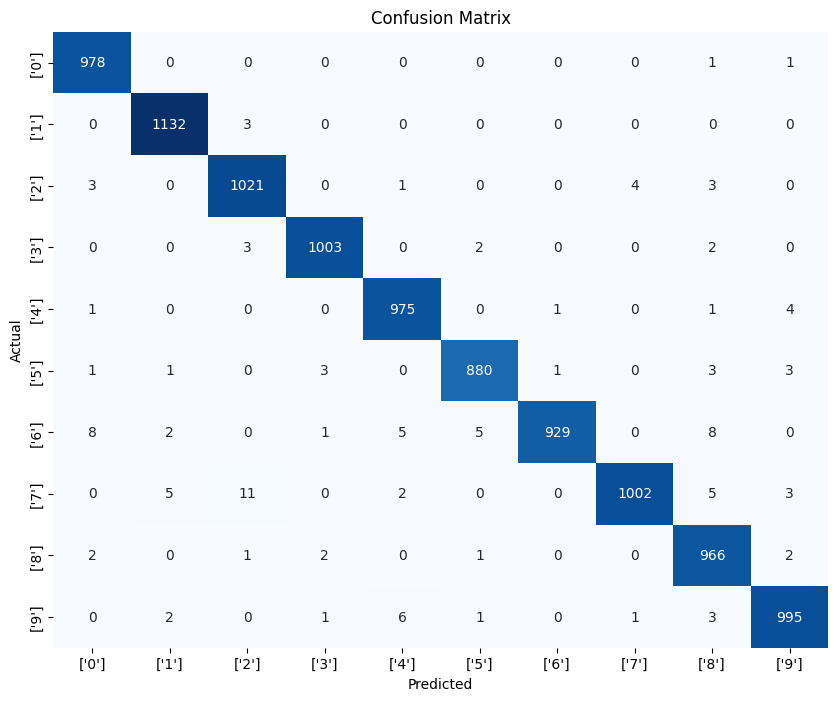

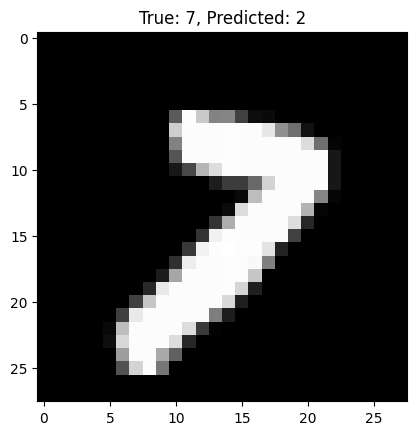

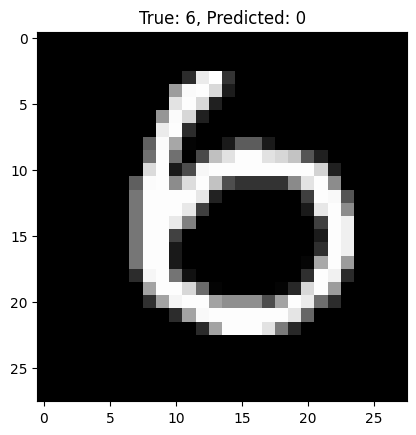

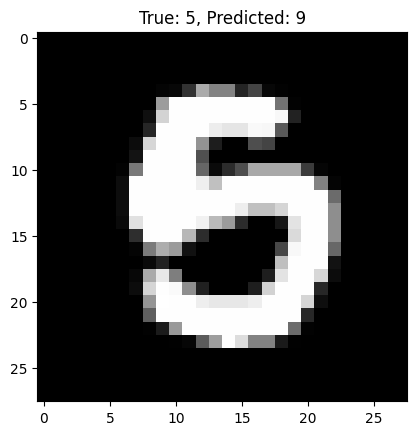

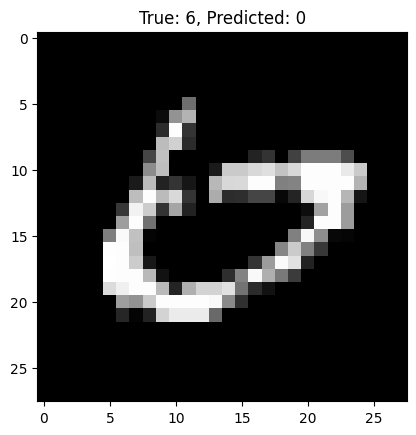

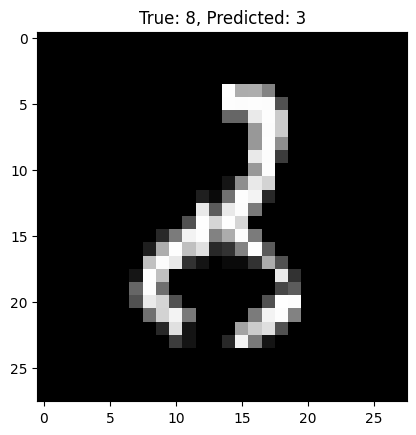

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets, transforms
import wandb
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import itertools
import seaborn as sns

# Initialize W&B
num_classes=10

# Define hyperparameters grid
hyperparam_grid = {
    "learning_rate": [0.001, 0.01],
    "batch_size": [32,64],
    "kernel_size": [3],
    "stride": [1],
    "num_epochs": [5],
    "dropout": [0.0, 0.3],
}

# hyperparam_grid = {
#     "learning_rate": [0.01],
#     "batch_size": [32],
#     "kernel_size": [3],
#     "stride": [1],
#     "num_epochs": [1],
#     "dropout": [0.0],
# }

best_model = None
best_train_accuracy = 0.0

# Function to train and evaluate a model with given hyperparameters
def run_experiment(hyperparams):
    learning_rate = hyperparams["learning_rate"]
    batch_size = hyperparams["batch_size"]
    kernel_size = hyperparams["kernel_size"]
    stride = hyperparams["stride"]
    num_epochs = hyperparams["num_epochs"]
    dropout = hyperparams["dropout"]
    
    print(f"Training with Hyperparameters: {hyperparams}")

    # Define the CNN model
    class CNN(nn.Module):
        def __init__(self):
            super(CNN, self).__init__()
            self.conv1 = nn.Conv2d(1, 16, kernel_size=kernel_size, stride=stride, padding=1)
            self.relu1 = nn.ReLU()
            self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
            self.conv2 = nn.Conv2d(16, 32, kernel_size=kernel_size, stride=stride, padding=1)
            self.relu2 = nn.ReLU()
            self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
            self.fc1 = nn.Linear(32 * 7 * 7, 128)
            self.dropout = nn.Dropout(dropout)
            self.fc2 = nn.Linear(128, num_classes)

        def forward(self, x):
            x = self.conv1(x)
            x = self.relu1(x)
            x = self.maxpool1(x)
            x = self.conv2(x)
            x = self.relu2(x)
            x = self.maxpool2(x)
            x = x.view(x.size(0), -1)
            x = self.fc1(x)
            x = self.dropout(x)
            x = self.fc2(x)
            return x

    trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
    testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

    # Initialize W&B for this experiment
    wandb.init(project="q4",entity="ashishchokhani2910",config=hyperparams)

    # Initialize the model and optimizer
    model = CNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    train_loss_history, train_acc_history = train_model(model, trainloader, criterion, optimizer, num_epochs)

    # Evaluate the model
    cm, cr = evaluate_model(model, testloader)

    # Log metrics to W&B
    wandb.log({"Train Loss": train_loss_history, "Train Accuracy": train_acc_history})
    wandb.log({"Confusion Matrix": cm})
    # wandb.log({"Classification Report": cr})
    
    global best_model, best_train_accuracy
    
    if train_acc_history[-1] > best_train_accuracy:
        best_train_accuracy = train_acc_history[-1]
        best_model = model

# Function to train the model
def train_model(model, trainloader, criterion, optimizer, num_epochs):
    model.train()
    train_loss_history = []
    train_acc_history = []

    for epoch in range(num_epochs):
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for images, labels in trainloader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_accuracy = 100 * correct_train / total_train
        train_loss = running_loss / len(trainloader)
        train_loss_history.append(train_loss)
        train_acc_history.append(train_accuracy)

        wandb.log({"Train Loss": train_loss, "Train Accuracy": train_accuracy})

        print(f'Epoch [{epoch+1}/{num_epochs}] | Train Loss: {train_loss:.4f} | Train Acc: {train_accuracy:.2f}%')

    return train_loss_history, train_acc_history

# Function to evaluate the model
def evaluate_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in dataloader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)
    cr = classification_report(all_labels, all_preds, target_names=[str(i) for i in range(num_classes)], output_dict=True,zero_division=1)

    return cm, cr

# Function to evaluate the best model on the test set
def evaluate_best_model(model, dataloader):
    model.eval()
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    misclassified_images = []

    with torch.no_grad():
        for images, labels in dataloader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            
            for i in range(len(predicted)):
                if predicted[i] != labels[i]:
                    misclassified_images.append((images[i], labels[i], predicted[i]))

    test_accuracy = 100 * correct / total
    per_class_accuracy = [0] * num_classes
    for i in range(num_classes):
        correct = sum([1 for p, label in zip(all_preds, all_labels) if p == i and label == i])
        total = sum([1 for label in all_labels if label == i])
        per_class_accuracy[i] = correct / total if total > 0 else 0
    
    cm = confusion_matrix(all_labels, all_preds)
    classification_rep = classification_report(all_labels, all_preds, target_names=[str(i) for i in range(num_classes)], output_dict=True,zero_division=1)

    return test_accuracy, per_class_accuracy, classification_rep,misclassified_images,cm

# Run experiments for all hyperparameter combinations
combinations = list(itertools.product(*hyperparam_grid.values()))
for combo in combinations:
    hyperparams = {key: val for key, val in zip(hyperparam_grid.keys(), combo)}
    run_experiment(hyperparams)
    
# Evaluate the best model on the test set
if best_model is not None:
    test_accuracy,_,_,misclassified_images,confusion_matrix = evaluate_best_model(best_model, testloader)
    print("Best Model Test Accuracy:", test_accuracy)
    print("Confusion Matrix:")

   # Create a heatmap of the confusion matrix for visualization
    plt.figure(figsize=(10, 8))
    classes = [str(i) for i in range(num_classes)]
    classes=np.array(classes)
    classes = classes[:, np.newaxis]
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes,cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    num_misclassified_to_visualize = min(5, len(misclassified_images))
    for i in range(num_misclassified_to_visualize):
        image, true_label, predicted_label = misclassified_images[i]
        image = image[0].cpu().numpy()  # Convert the image tensor to a numpy array
        plt.figure()
        plt.title(f"True: {true_label}, Predicted: {predicted_label}")
        plt.imshow(image, cmap='gray')
        plt.show()
        
else:
    print("No best model found.")


## W&B report for above hyperparameters

https://wandb.ai/ashishchokhani2910/q4/reports/CNN-trained-on-MNIST-dataset--Vmlldzo1NzU2NzI1

In [9]:
# Running and evaluating the model on the Noisy dataset
from scipy.io import loadmat
json_dataset = loadmat('mnist-with-awgn.mat')

train_x = json_dataset['train_x']
train_y = json_dataset['train_y']
test_x = json_dataset['test_x']
test_y = json_dataset['test_y']

train_x = train_x.reshape((train_x.shape[0],28,28))
test_x = test_x.reshape((test_x.shape[0],28,28))

pretrained_model = best_model

In [10]:
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader, random_split

class NoisyMNISTdataset():
    def __init__(self,X,y):
        self.X = X
        self.y = y
        self.length = len(X)
        
    def __getitem__(self,index):
            transform = ToTensor()
            return transform(self.X[index]),np.argmax(self.y[index])
    
    def __len__(self):
        return self.length

train_dataset = NoisyMNISTdataset(train_x,train_y)
test_dataset = NoisyMNISTdataset(test_x,test_y)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

optimizer = optim.Adam(pretrained_model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    pretrained_model.train()
    total_train_loss = 0
    correct_train = 0
    n_samples=0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = pretrained_model(data)
        n_samples+=len(data)
        loss = criterion(output, target)
        total_train_loss += loss.item()
        pred = output.argmax(dim=1, keepdim=True)
        correct_train += pred.eq(target.view_as(pred)).sum().item()
        loss.backward()
        optimizer.step()
    
    train_loss = total_train_loss / n_samples
    train_accuracy = 100. * correct_train / n_samples
        
    print(f"Epoch: {epoch+1}, Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy}")

Epoch: 1, Train Loss: 0.0029, Train Acc: 96.98666666666666
Epoch: 2, Train Loss: 0.0018, Train Acc: 98.09833333333333
Epoch: 3, Train Loss: 0.0015, Train Acc: 98.4
Epoch: 4, Train Loss: 0.0012, Train Acc: 98.72166666666666
Epoch: 5, Train Loss: 0.0010, Train Acc: 98.92166666666667
Epoch: 6, Train Loss: 0.0008, Train Acc: 99.10833333333333
Epoch: 7, Train Loss: 0.0007, Train Acc: 99.24
Epoch: 8, Train Loss: 0.0006, Train Acc: 99.31
Epoch: 9, Train Loss: 0.0005, Train Acc: 99.405
Epoch: 10, Train Loss: 0.0005, Train Acc: 99.38333333333334


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for data, labels in test_loader:
            outputs = model(data)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    print("Accuracy on the test dataset", acc)
    
    report = classification_report(all_labels, all_preds, zero_division = 0)
    print("Classification report fo the test dataset\n", report)

    return all_labels, all_preds

evaluate_model(pretrained_model,test_loader=test_loader)

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

class Autoencoder(nn.Module):
    def __init__(self, encoding_dim=32):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, encoding_dim),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 28 * 28),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

def train_autoencoder(model, train_loader, val_loader, epochs=5):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters())
    
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for data, _ in train_loader:
            data = data.view(data.size(0), -1)
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, data)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_losses.append(train_loss/len(train_loader))
        
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for data, _ in val_loader:
                data = data.view(data.size(0), -1)
                outputs = model(data)
                loss = criterion(outputs, data)
                val_loss += loss.item()
        val_losses.append(val_loss/len(val_loader))
        
        print(f'Epoch {epoch+1}, Train Loss: {train_loss/len(train_loader):.4f}, Val Loss: {val_loss/len(val_loader):.4f}')
    
    return train_losses, val_losses

In [8]:
transform = transforms.ToTensor()

train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=256, shuffle=False)

def add_noise(data, noise_factor=0.4):
    data = data + noise_factor * torch.randn(data.shape)
    data = torch.clamp(data, 0., 1.)
    return data

noisy_train_loader = [(add_noise(data), target) for data, target in train_loader]

In [9]:
model = Autoencoder()

# Split training data into train and validation
from torch.utils.data import random_split

train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_subset, val_subset = random_split(train_dataset, [train_size, val_size])

train_subset_loader = torch.utils.data.DataLoader(train_subset, batch_size=256, shuffle=True)
val_subset_loader = torch.utils.data.DataLoader(val_subset, batch_size=256)
train_losses, val_losses = train_autoencoder(model, train_subset_loader, val_subset_loader)

Epoch 1, Train Loss: 0.0845, Val Loss: 0.0506
Epoch 2, Train Loss: 0.0419, Val Loss: 0.0362
Epoch 3, Train Loss: 0.0329, Val Loss: 0.0300
Epoch 4, Train Loss: 0.0277, Val Loss: 0.0258
Epoch 5, Train Loss: 0.0242, Val Loss: 0.0229


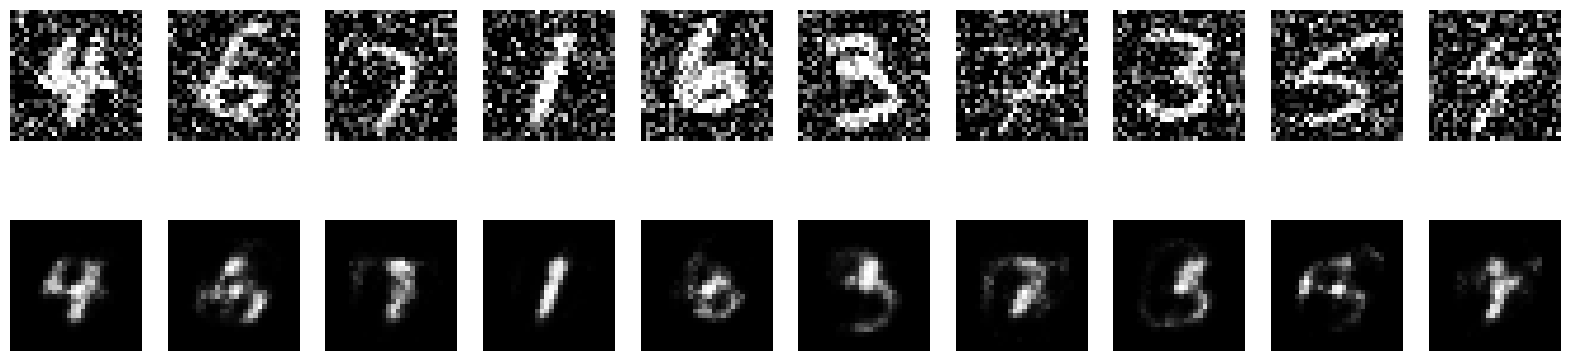

In [10]:
import matplotlib.pyplot as plt

def visualize_images(original_images, denoised_images, n=10):
    fig, axes = plt.subplots(2, n, figsize=(20, 5))

    for i in range(n):
        # Display original
        ax = axes[0, i]
        ax.imshow(original_images[i].detach().numpy().reshape(28, 28), cmap='gray')
        ax.axis('off')

        # Display reconstruction
        ax = axes[1, i]
        ax.imshow(denoised_images[i].detach().numpy().reshape(28, 28), cmap='gray')
        ax.axis('off')

    plt.show()

# Sample a batch from the noisy_train_loader
noisy_data, _ = next(iter(noisy_train_loader))
with torch.no_grad():
    denoised_data = model(noisy_data.view(noisy_data.size(0), -1)).view(noisy_data.size(0), 1, 28, 28)

visualize_images(noisy_data, denoised_data)

In [14]:
class SimpleClassifier(nn.Module):
    def __init__(self):
        super(SimpleClassifier, self).__init__()
        self.fc = nn.Linear(28*28, 10)

    def forward(self, x):
        return self.fc(x)

def train_classifier(model, train_loader, val_loader, epochs=10):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(),lr=0.01)
    
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        correct_train = 0
        total_train = 0
        for (data, targets) in train_loader:
            data = data.view(data.size(0), -1)
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

            _, predicted = outputs.max(1)
            total_train += targets.size(0)
            correct_train += predicted.eq(targets).sum().item()

        train_accuracies.append(100 * correct_train / total_train)
        train_losses.append(train_loss/len(train_loader))

        model.eval()
        val_loss = 0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for data, targets in val_loader:
                data = data.view(data.size(0), -1)
                outputs = model(data)
                loss = criterion(outputs, targets)
                val_loss += loss.item()

                _, predicted = outputs.max(1)
                total_val += targets.size(0)
                correct_val += predicted.eq(targets).sum().item()

        val_accuracies.append(100 * correct_val / total_val)
        val_losses.append(val_loss/len(val_loader))
        
        print(f'Epoch {epoch+1}, Train Loss: {train_loss/len(train_loader):.4f}, Val Loss: {val_loss/len(val_loader):.4f}, Train Acc: {100 * correct_train / total_train:.2f}%, Val Acc: {100 * correct_val / total_val:.2f}%')
    
    return train_losses, val_losses, train_accuracies, val_accuracies

In [15]:
# Denoise the training and validation subsets
with torch.no_grad():
    denoised_train_subset = [(model(data[0].view(data[0].size(0), -1)).view(data[0].size(0), 1, 28, 28), data[1]) for data in train_subset_loader]
    denoised_val_subset = [(model(data[0].view(data[0].size(0), -1)).view(data[0].size(0), 1, 28, 28), data[1]) for data in val_subset_loader]

classifier = SimpleClassifier()
train_losses, val_losses, train_accuracies, val_accuracies = train_classifier(classifier, denoised_train_subset, denoised_val_subset)
from sklearn.metrics import classification_report

def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for data, targets in test_loader:
            data = data.view(data.size(0), -1)
            outputs = model(data)
            _, preds = outputs.max(1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(targets.cpu().numpy())
    
    print(classification_report(all_labels, all_preds))

evaluate_model(classifier, test_loader)

Epoch 1, Train Loss: 0.4697, Val Loss: 0.3446, Train Acc: 86.13%, Val Acc: 89.94%
Epoch 2, Train Loss: 0.3238, Val Loss: 0.3047, Train Acc: 90.45%, Val Acc: 90.93%
Epoch 3, Train Loss: 0.2894, Val Loss: 0.2838, Train Acc: 91.51%, Val Acc: 91.65%
Epoch 4, Train Loss: 0.2685, Val Loss: 0.2701, Train Acc: 92.14%, Val Acc: 92.05%
Epoch 5, Train Loss: 0.2536, Val Loss: 0.2599, Train Acc: 92.59%, Val Acc: 92.47%
Epoch 6, Train Loss: 0.2423, Val Loss: 0.2519, Train Acc: 92.92%, Val Acc: 92.69%
Epoch 7, Train Loss: 0.2332, Val Loss: 0.2454, Train Acc: 93.15%, Val Acc: 92.88%
Epoch 8, Train Loss: 0.2256, Val Loss: 0.2399, Train Acc: 93.36%, Val Acc: 93.13%
Epoch 9, Train Loss: 0.2191, Val Loss: 0.2352, Train Acc: 93.53%, Val Acc: 93.25%
Epoch 10, Train Loss: 0.2136, Val Loss: 0.2312, Train Acc: 93.70%, Val Acc: 93.36%
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       980
           1       0.85      0.93      0.89      1135
           2    

## Comparison of results/analysis scores

- 76% Accuracy after Denoising: After applying a denoising technique, the model achieved an accuracy of 76% on the test dataset. This accuracy indicates that the model correctly predicted 76% of the data points in the test dataset.

- 31% Accuracy before Denoising: Prior to denoising, the model's accuracy on the test dataset was only 26%. This suggests that the model was performing poorly on noisy or unprocessed data.

- Denoising the MNIST Dataset: In the case of the MNIST dataset, it involved cleaning up images of handwritten digits.

Increasing Test Dataset Accuracy: The key observation is that denoising the MNIST dataset had a substantial positive impact on test dataset accuracy. The accuracy improved from 31% before denoising to 76% after denoising.